In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
warnings.filterwarnings("ignore")



In [2]:
# import dataset
df=pd.read_csv("pizza_sales.csv")

In [3]:
df.head()  # Display the first few rows of the merged dataset

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
# check shap of dataset
df.shape

(48620, 12)

In [5]:
# check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [6]:
#check missing values
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
#check duplicates
df.duplicated().sum()

0

In [8]:
df["pizza_id"].nunique()

48620

In [9]:
# Convert float columns to integer
df[['pizza_id', 'order_id', 'quantity']] = df[['pizza_id', 'order_id', 'quantity']].astype(int)

# Ensure Numeric_col is defined before using it
Numeric_col = df[['order_id', 'quantity', 'unit_price', 'total_price']]
Numeric_col[['order_id', 'quantity']] = Numeric_col[['order_id', 'quantity']].astype(int)
Numeric_col

,order_id,quantity,unit_price,total_price
0,1,1,13.25,13.25
1,2,1,16.00,16.00
2,2,1,18.50,18.50
3,2,1,20.75,20.75
4,2,1,16.00,16.00
...,...,...,...,...
48615,21348,1,16.75,16.75
48616,21348,1,17.95,17.95
48617,21348,1,12.00,12.00
48618,21349,1,20.25,20.25


<function matplotlib.pyplot.show(close=None, block=None)>

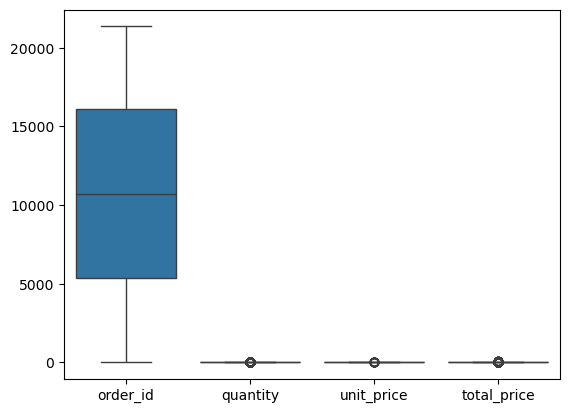

In [10]:
# box plot for check outliers
sns.boxplot(data=Numeric_col)
plt.show

In [11]:
# convert date to datetime
df["order_date"].value_counts()

order_date
26-11-2015    261
27-11-2015    259
15-10-2015    258
4/7/2015      233
3/7/2015      207
             ... 
27-12-2015     87
22-11-2015     82
29-12-2015     77
22-03-2015     76
30-12-2015     73
Name: count, Length: 358, dtype: int64

In [12]:
# Convert column to datetime (handling multiple formats)
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

# Now all dates will be in standard format: YYYY-MM-DD
print(df['order_date'].head())


0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: order_date, dtype: datetime64[ns]


In [13]:
df["order_date"].nunique()

142

In [14]:
df["order_date"]=pd.to_datetime(df["order_date"])

In [15]:
df.head()  # Display the first few rows of the merged dataset

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# 🔹 1. Sales Analysis
### 📆 Total sales per day / month

### 💰 Highest revenue-generating day

### 💸 Total revenue (sum of total_price)



In [16]:
# Extract day, month, and year from the order_date column
df['day'] = df['order_date'].dt.day
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year


In [17]:
# Total sales per
total_sales = df['total_price'].sum()
total_sales

817860.05

In [18]:
# Total sales per day
daily_sales = df.groupby('day')['total_price'].sum()
daily_sales

day
1.0     29608.55
2.0     27495.40
3.0     27993.15
4.0     29675.65
5.0     23988.40
6.0     28097.45
7.0     27636.40
8.0     27976.90
9.0     27963.90
10.0    26967.95
11.0    27756.20
12.0    24169.85
Name: total_price, dtype: float64

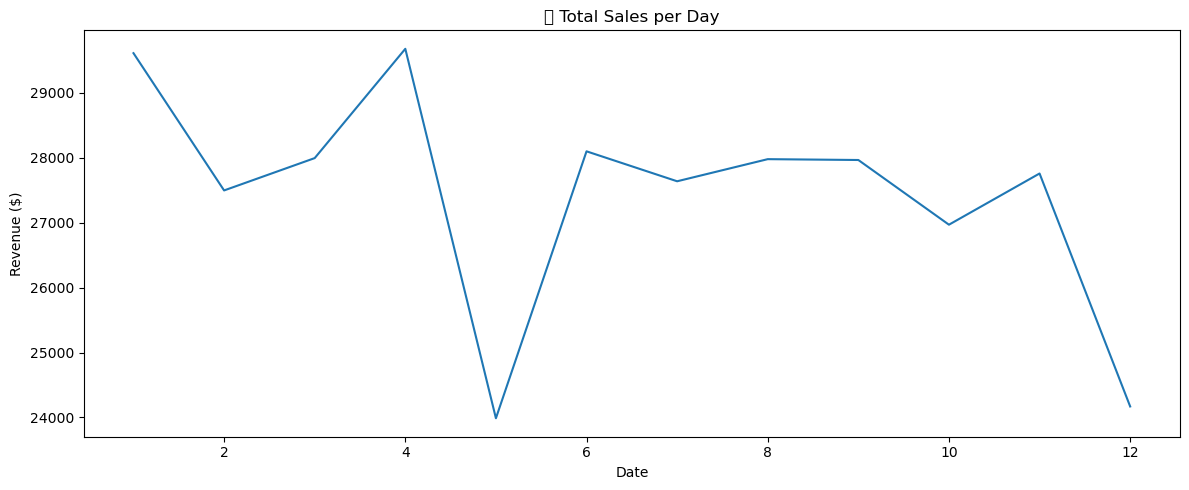

In [19]:
plt.figure(figsize=(12, 5))
daily_sales.plot()
plt.title("📅 Total Sales per Day")
plt.ylabel("Revenue ($)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [20]:
# Total sales per month
Monthly_sales = df.groupby('month')['total_price'].sum()
Monthly_sales

month
1.0     27781.70
2.0     28235.55
3.0     27088.85
4.0     28100.45
5.0     27742.35
6.0     28166.20
7.0     29313.65
8.0     26757.85
9.0     28340.25
10.0    22843.35
11.0    27146.70
12.0    27812.90
Name: total_price, dtype: float64

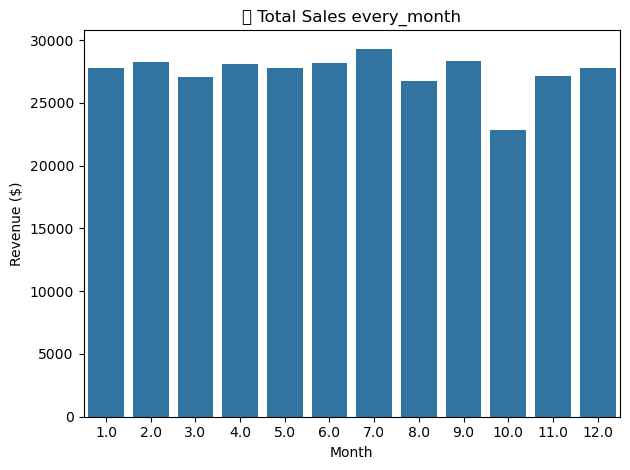

In [23]:
# monthly sales graph
sns.barplot(x=Monthly_sales.index, y=Monthly_sales.values)
plt.title("📅 Total Sales every_month")
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# 🔹 2. Top Selling Pizzas

### 🍕 Most sold pizza (by quantity)

### 🧀 Most ordered category (Classic, Veggie, etc.)

### 🔢 Most popular pizza sizes

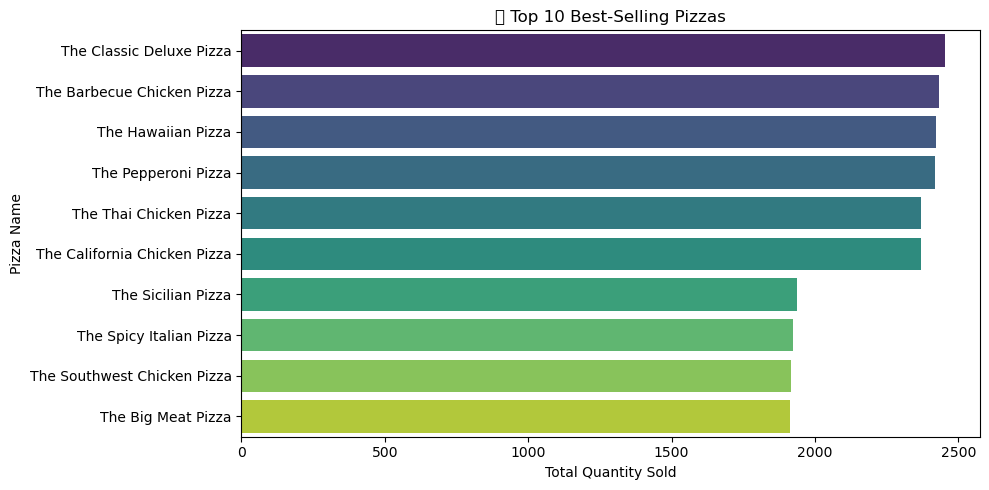

In [49]:
# most sold piza by quantity
top_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette="viridis")
plt.title("🍕 Top 10 Best-Selling Pizzas")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Pizza Name")
plt.tight_layout()
plt.show()


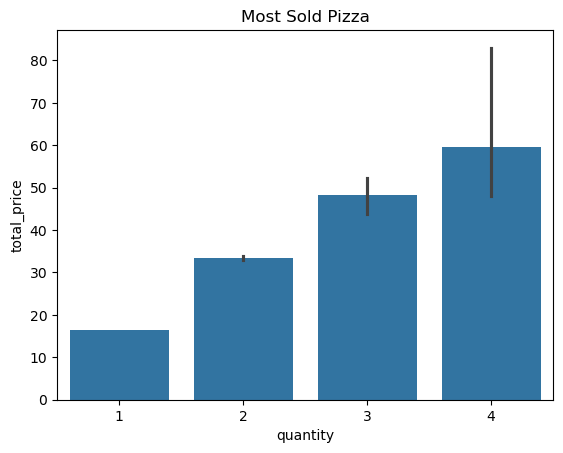

In [32]:
#plot a graph 
sns.barplot(data=df,x="quantity",y="total_price")
plt.title("Most Sold Pizza")
plt.show()

In [34]:
df["pizza_category"].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [47]:
# most sold piza by category
most_sold_pizza_category=df.groupby("pizza_category")["total_price"].sum().sort_values(ascending=False).head(10)
most_sold_pizza_category

pizza_category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_price, dtype: float64

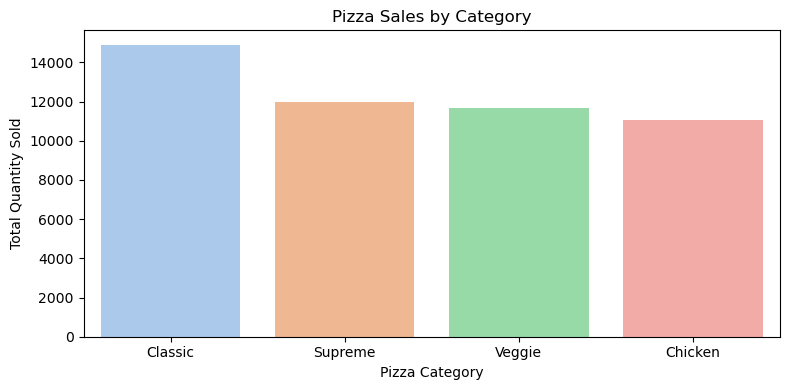

In [51]:
category_sales = df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="pastel")
plt.title("Pizza Sales by Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

In [41]:
df["pizza_size"].value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [44]:
# most sold pizza by piza size
most_sold_pizza_size=df.groupby("pizza_size")["total_price"].sum()
most_sold_pizza_size

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

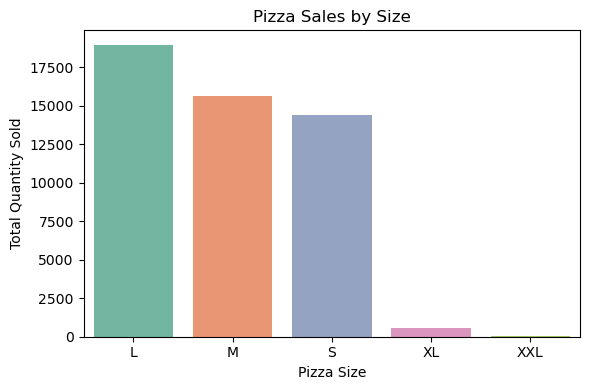

In [53]:
# 🔢 Most Popular Pizza Sizes
size_sales = df.groupby('pizza_size')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=size_sales.index, y=size_sales.values, palette="Set2")
plt.title("Pizza Sales by Size")
plt.xlabel("Pizza Size")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

# 🔹 3. Time-Based Trends

### 📅 Orders per month / weekday

### ⏰ Orders by time of day (peak hours)

### 📉 Seasonal trends (e.g. does Jan have fewer orders?)



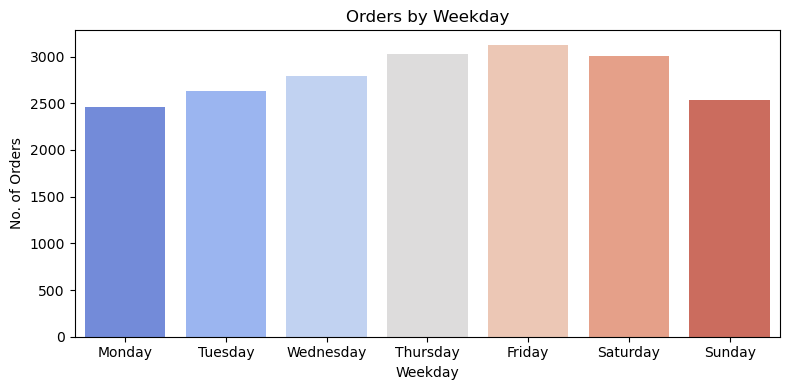

In [56]:
# Optional: set order of weekdays
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a 'Weekday' column if it doesn't exist
df['Weekday'] = df['order_date'].dt.day_name()

# Count orders by weekday and reindex to match the desired order
weekday_orders = df['Weekday'].value_counts().reindex(week_order)

plt.figure(figsize=(8, 4))
sns.barplot(x=weekday_orders.index, y=weekday_orders.values, palette="coolwarm")
plt.title("Orders by Weekday")
plt.ylabel("No. of Orders")
plt.xlabel("Weekday")
plt.tight_layout()
plt.show()


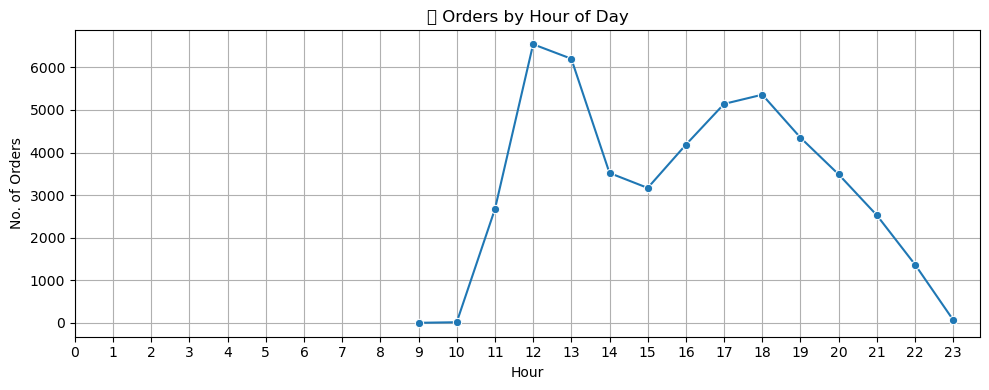

In [58]:
# Extract the hour from the order_time column and create a new column 'Hour'
df['Hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.hour

# Count orders by hour
hourly_orders = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker="o")
plt.title("⏰ Orders by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("No. of Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


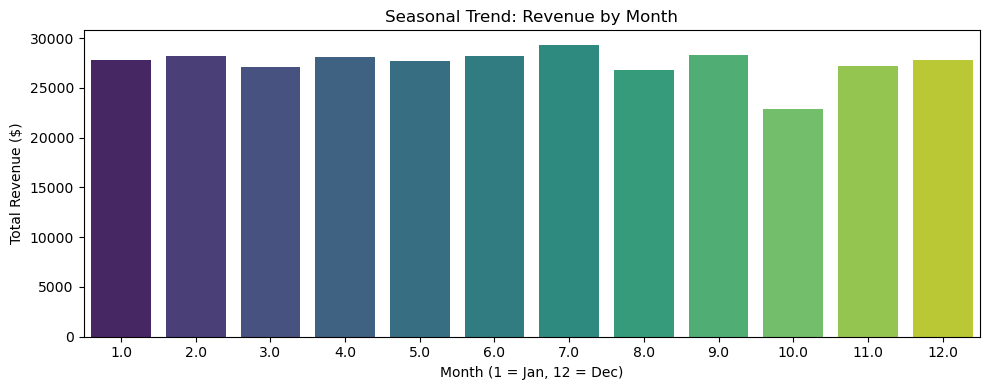

In [59]:
df['Month_Num'] = df['order_date'].dt.month
monthly_revenue = df.groupby('Month_Num')['total_price'].sum()

plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')
plt.title("Seasonal Trend: Revenue by Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()


# 🔹 4. Customer Behavior Insights (if extended)

### 🚚 Average order value

### 📦 Orders with highest quantity

### 🔄 Repeated pizza names in multiple orders

In [60]:
# 🚚 1. Average Order Value (AOV)
order_totals = df.groupby('order_id')['total_price'].sum()
average_order_value = order_totals.mean()

print(f"🚚 Average Order Value (AOV): ${average_order_value:.2f}")

🚚 Average Order Value (AOV): $38.31


In [61]:
# 📦 2. Orders with Highest Quantity (Top 10 orders with most items)
order_quantities = df.groupby('order_id')['quantity'].sum().sort_values(ascending=False)
top_orders = order_quantities.head(10)
print("📦 Top 10 Orders by Quantity:")
print(top_orders)


📦 Top 10 Orders by Quantity:
order_id
18845    28
10760    25
18513    15
21158    15
20163    15
17464    15
20839    15
2075     15
1685     15
16242    15
Name: quantity, dtype: int64


In [62]:
# 🔄 3. Repeated Pizza Names in Multiple Orders

# Count number of unique orders per pizza
pizza_repeats = df.groupby('pizza_name')['order_id'].nunique().sort_values(ascending=False)

# Show top 10 pizzas that appeared in most distinct orders
print("🔄 Most Frequently Ordered Pizzas (in separate orders):")
print(pizza_repeats.head(10))


🔄 Most Frequently Ordered Pizzas (in separate orders):
pizza_name
The Classic Deluxe Pizza        2329
The Hawaiian Pizza              2280
The Pepperoni Pizza             2278
The Barbecue Chicken Pizza      2273
The Thai Chicken Pizza          2225
The California Chicken Pizza    2197
The Southwest Chicken Pizza     1825
The Spicy Italian Pizza         1822
The Sicilian Pizza              1820
The Big Meat Pizza              1811
Name: order_id, dtype: int64


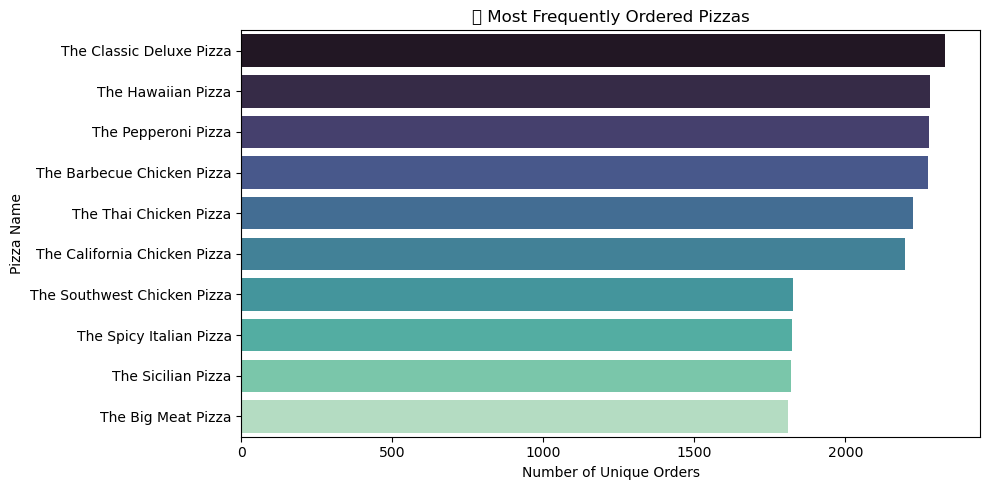

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(x=pizza_repeats.head(10).values, y=pizza_repeats.head(10).index, palette='mako')
plt.title("🔄 Most Frequently Ordered Pizzas")
plt.xlabel("Number of Unique Orders")
plt.ylabel("Pizza Name")
plt.tight_layout()
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create dropdown for selecting analysis
analysis_dropdown = widgets.Dropdown(
    options=[
        'Total Sales per Month',
        'Daily Sales Trend',
        'Top Selling Pizzas',
        'Pizza Sales by Category',
        'Pizza Sales by Size',
        'Orders by Weekday',
        'Orders by Hour of Day',
        'Seasonal Revenue Trend',
        'Average Order Value',
        'Top Orders by Quantity',
        'Most Frequently Ordered Pizzas'
    ],
    description='Analysis:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Output widget to display the selected analysis
output = widgets.Output()

# Function to update the dashboard based on the selected analysis
def update_dashboard(change):
    with output:
        clear_output(wait=True)
        if change['new'] == 'Total Sales per Month':
            sns.barplot(x=Monthly_sales.index, y=Monthly_sales.values)
            plt.title("📅 Total Sales per Month")
            plt.ylabel("Revenue ($)")
            plt.xlabel("Month")
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Daily Sales Trend':
            daily_sales.plot()
            plt.title("📅 Total Sales per Day")
            plt.ylabel("Revenue ($)")
            plt.xlabel("Day")
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Top Selling Pizzas':
            sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette="viridis")
            plt.title("🍕 Top 10 Best-Selling Pizzas")
            plt.xlabel("Total Quantity Sold")
            plt.ylabel("Pizza Name")
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Pizza Sales by Category':
            sns.barplot(x=category_sales.index, y=category_sales.values, palette="pastel")
            plt.title("Pizza Sales by Category")
            plt.xlabel("Pizza Category")
            plt.ylabel("Total Quantity Sold")
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Pizza Sales by Size':
            sns.barplot(x=size_sales.index, y=size_sales.values, palette="Set2")
            plt.title("Pizza Sales by Size")
            plt.xlabel("Pizza Size")
            plt.ylabel("Total Quantity Sold")
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Orders by Weekday':
            sns.barplot(x=weekday_orders.index, y=weekday_orders.values, palette="coolwarm")
            plt.title("Orders by Weekday")
            plt.ylabel("No. of Orders")
            plt.xlabel("Weekday")
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Orders by Hour of Day':
            sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker="o")
            plt.title("⏰ Orders by Hour of Day")
            plt.xlabel("Hour")
            plt.ylabel("No. of Orders")
            plt.xticks(range(0, 24))
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Seasonal Revenue Trend':
            sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')
            plt.title("Seasonal Trend: Revenue by Month")
            plt.xlabel("Month (1 = Jan, 12 = Dec)")
            plt.ylabel("Total Revenue ($)")
            plt.tight_layout()
            plt.show()
        elif change['new'] == 'Average Order Value':
            print(f"🚚 Average Order Value (AOV): ${average_order_value:.2f}")
        elif change['new'] == 'Top Orders by Quantity':
            print("📦 Top 10 Orders by Quantity:")
            print(top_orders)
        elif change['new'] == 'Most Frequently Ordered Pizzas':
            sns.barplot(x=pizza_repeats.head(10).values, y=pizza_repeats.head(10).index, palette='mako')
            plt.title("🔄 Most Frequently Ordered Pizzas")
            plt.xlabel("Number of Unique Orders")
            plt.ylabel("Pizza Name")
            plt.tight_layout()
            plt.show()

# Attach the update function to the dropdown
analysis_dropdown.observe(update_dashboard, names='value')

# Display the dashboard
display(analysis_dropdown, output)

Dropdown(description='Analysis:', layout=Layout(width='50%'), options=('Total Sales per Month', 'Daily Sales T…

Output()